In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
# Import the time function
from time import time

# Generating random numbers

How do we generate random numbers on the computer, which is fundamentally a deterministic machine?

## Historic Lotto numbers (1986 - 2016)

<BarContainer object of 34 artists>

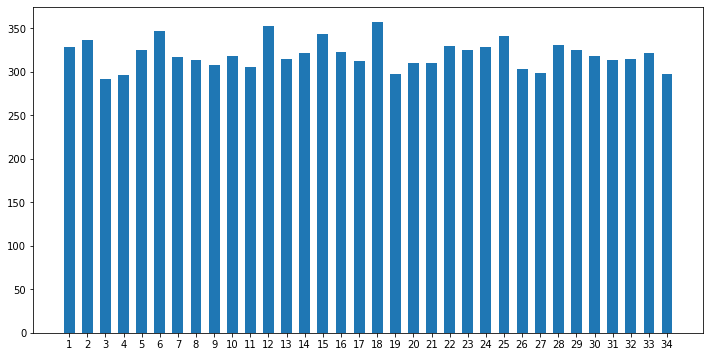

In [4]:
# Data taken from https://www.norsk-tipping.no/miscellaneous/getNumberStatisticsLotto.htm
# These are (presumably) true, random numbers, generated
# by a complicated physical contraption.
number = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34])
counts = np.array([328,336,292,296,325,347,317,314,308,318,306,353,315,322,343,323,312,357,298,310,310,330,325,329,341,303,299,331,325,318,313,315,322,297])

fig = plt.figure(figsize = (12, 6))
plt.xticks(number, number)
plt.bar(number, counts, width = 0.6)

## Hardware random number generator

In [24]:
# Measure the timing of some unpredictable physical event
# for example radioactivity using a Geiger counter, then
# use the last digits of the timestamp as a source of
# random numbers.

# Time returns number of seconds since 1. 1. 1970 (unix time) with six decimals
# Multiply by 1000000 and take the result modulo 100 to keep last two digits.
# If the time between events is both unpredictable, and much longer than 100 microseconds
# then these are essentially random numbers.
r = int(1e6*time() % 100)
print(r)

25


## Random numbers in plain python

In [17]:
from random import random, randint
print(random()) # One random number between 0 and 1
print(randint(1, 6)) # one random integer between 1 and 6 (inclusive)

0.8606932018749139
2


## Random numbers in numpy

In [18]:
# An array of N random numbers between 0 and 1
N = 10
np.random.random(N)

array([ 0.64088008,  0.05171103,  0.42593667,  0.7040411 ,  0.39534918,
        0.40885125,  0.05856888,  0.05749582,  0.37707926,  0.37655529])

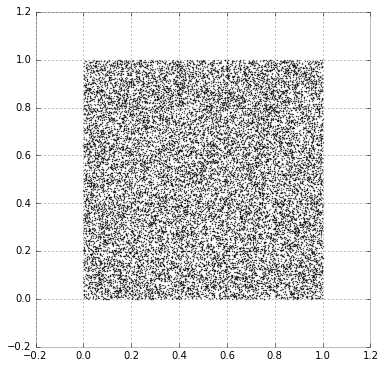

In [28]:
N = 20000
fig = plt.figure(figsize = (6,6))
# s sets markersize, alpha sets transparency
X = np.random.random(size = N)
Y = np.random.random(size = N)
plt.scatter(X, Y, marker = 'o', s = 1, alpha = 0.5, color = 'k')

## Gaussian random numbers from numpy

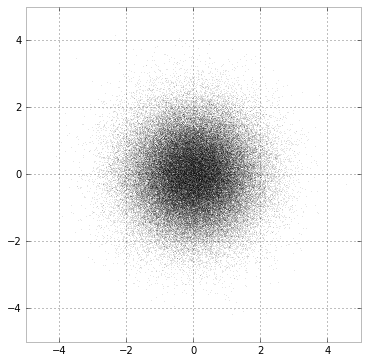

In [30]:
N = 100000
# Set figure size and limits
fig = plt.figure(figsize = (6,6))
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# s sets markersize, alpha sets transparency
X = np.random.normal(size = N)
Y = np.random.normal(size = N)
plt.scatter(X, Y, marker = '.', s = 1, alpha = 0.1, color = 'k')

In [25]:
## Other distributions, from numpy and scipy

Text(0.5, 1.0, 'Left-skewed Gumbel')

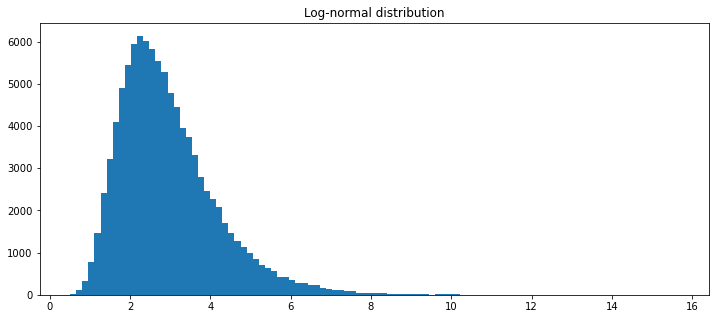

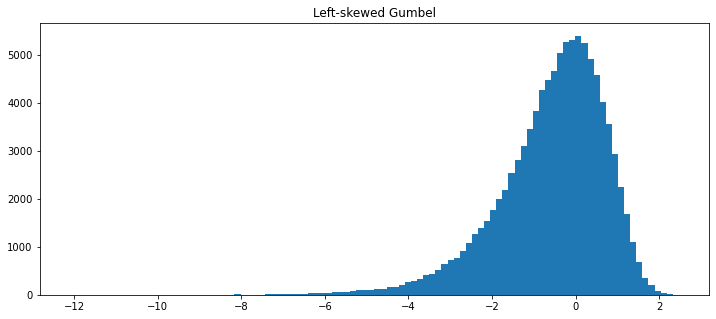

In [32]:
# numpy contains a number of different distributions
# http://docs.scipy.org/doc/numpy/reference/routines.random.html
N = 100000
nbins = 100
# Plot a histogram to visualise shape of distribution
fig = plt.figure(figsize = (12, 5))
random_numbers = np.random.lognormal(size = N, mean = 1, sigma = 0.4)
counts, bins, fig = plt.hist(random_numbers, bins = nbins)
plt.title('Log-normal distribution')

# Scipy contains an even greater number of different distributions
# https://docs.scipy.org/doc/scipy/reference/stats.html

# Here showing the left-skewed Gumbel
from scipy.stats import gumbel_l
N = 100000
nbins = 100
# Plot a histogram to visualise shape of distribution
fig = plt.figure(figsize = (12, 5))
random_numbers = gumbel_l(loc = 0, scale = 1).rvs(N)
counts, bins, fig = plt.hist(random_numbers, bins = nbins)
plt.title('Left-skewed Gumbel')


## Transformation of Random numbers

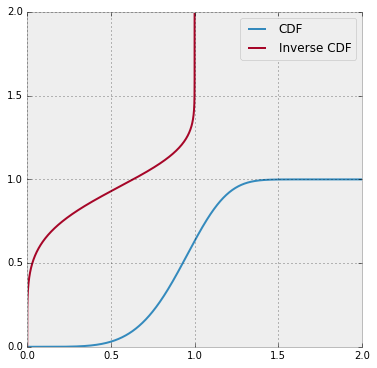

In [35]:
# Weibull distribution PDF and CDF
# See for example https://en.wikipedia.org/wiki/Weibull_distribution

# Parameters of the Weibull distribution
l = 1
k = 5

# Probability density function
def pdf(x, l, k):
    return (k/l)*(x/l)**(k-1)*np.exp(-(x/l)**k)

# Cumulative probability density function
# (given by the integral of pdf from -inf to x)
def cdf(x, l, k):
    return 1 - np.exp(-(x/l)**k)

# Create an array of x-values
N = 1000
x = np.linspace(0, 2, N)

# Set figure size and limits
fig = plt.figure(figsize = (6,6))
plt.xlim((0,2))
plt.ylim((0,2))

# Plot cdf as function of x and x as function of cdf
# (whic is the same as the inverse of the cdf)
plt.plot(x, cdf(x, l, k), label = 'CDF')
plt.plot(cdf(x, l, k), x, label = 'Inverse CDF')
plt.legend()

In [38]:
# Creating numerical inverse of CDF by using interpolation.
# There are many interpolation routines in scipy, see
# http://docs.scipy.org/doc/scipy/reference/interpolate.html
from scipy.interpolate import interp1d
x = np.linspace(0, 2, 1000)
inv = interp1d(cdf(x, 1, k), x, bounds_error = False)

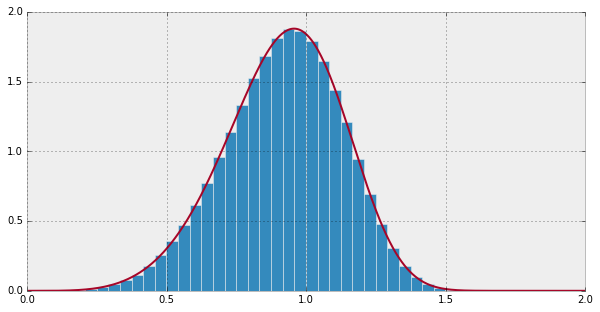

In [45]:
# Using the numerical inverse to generate numbers
# of the Weibull distribution, from uniformly distributed
# numbers between 0 and 1
N = 1000000
r = inv(np.random.random(size = N))

# Set figure size and limits
fig = plt.figure(figsize = (10,5))
plt.xlim((0,2))
plt.ylim((0,2))

# Generating a histogram to show the distribution
counts, bins, rects = plt.hist(r, bins = 40, normed = True)

# Plotting the true distribution as a continuous line, for comparison
x = np.linspace(0, 2, 1000)
plt.plot(x, pdf(x, l, k), lw = 2)

## RANDU

In [54]:
# RANDU is a historical example of a bad pseudorandom number generator
# See for example https://en.wikipedia.org/wiki/RANDU
def RANDU(r):
    return 65539*r % 2**31

In [55]:
# Initial value (seed), should be an odd number
r = 1
# Number of points
N = 10000

# To demonstrate the problem with RANDU, we will
# generate N triplets of numbers, and plot them as
# points in a 3D plot.

# Array to hold the coordinates of the points (x, y, z)
rand = np.zeros(3*N)
for i in range(3*N):
    # Use previous value of r to calculate new value
    r = RANDU(r)
    # scale to get numbers between 0 and 1
    rand[i] = r / 2**31

# Reshape array into triplets of _consecutive_ numbers
# for plotting as 3D point cloud
rand = rand.reshape((N,3))

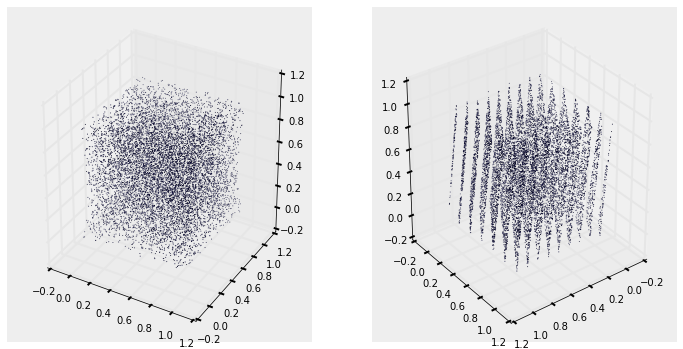

In [57]:
# Set up 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12, 6))

# Two different subfigures, to see data from two different orientations
# syntax of add_subplot is add_subplot(ijk), where
# i is number of rows, j number of columns, and k is the id of this plot
# counting from top left
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(rand[:,0], rand[:,1], rand[:,2], s = 1, marker = '.', color = 'k')
ax2.scatter(rand[:,0], rand[:,1], rand[:,2], s = 1, marker = '.', color = 'k')
# Change orientation of second plot to reveal planes
ax2.azim = 53